<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Михаил! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

# Проект "Поиск референсных фотографий"

Фотохостинге для профессиональных фотографов «Со Смыслом» (“With Sense”). Пользователи сервиса размещают свои фотографии на хостинге и сопровождают их полным описанием: указывают место съёмок, модель камеры и т. д. Отличительная особенность сервиса — описание: его может предоставить не только тот, кто размещает фотографию, но и другие пользователи портала.

# Постановка задачи

Необходимо реализовать поиск референсных фотографий. Суть поиска заключается в следующем: пользователь сервиса вводит описание нужной сцены. Сервис выводит несколько фотографий с такой же или похожей сценой.

Чтобы эксперимент получил право на жизнь, нужно защитить его перед руководителем компании. Для защиты необходимо презентовать так называемый PoC (Proof of Concept, Проверка концепции) — продемонстрировать, что такой проект практически осуществим. Необходимо разработать демонстрационную версию поиска изображений по запросу.
Для демонстрационной версии нужно выбрать лучшую  модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — и покажет, насколько текст и картинка подходят друг другу.

Также обязтельно учитывать юридические ограничения. В некоторых странах, где работает компания With Sense, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно, текстов, изображений, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16-ти лет. В PoC необходимо очистить данные от проблемного контента. Во время тестирования модели при появлении в запросе “вредного” контента должен отображаться дисклеймер.

In [ ]:
!pip install torch -q

In [ ]:
!pip install torchvision -q

In [ ]:
!pip install transformers -q

In [ ]:
#импорт необходимых библиотек
import os
import urllib.request
import zipfile
from pathlib import Path
from tqdm import tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.models import resnet18, ResNet18_Weights
from torchvision.models.feature_extraction import create_feature_extractor
from torchvision.io import read_image

from transformers import AutoTokenizer, AutoModel

from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

import warnings
warnings.filterwarnings("ignore")

D:\anaconda3\envs\practicum\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Михаил\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Михаил\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Михаил\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#инициализация констант
URL= 'https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip'
ROOT_FOLDER= 'D:/Projects/datasets/search_for_reference_photos'
TRAIN_IMAGE_FOLDER= ROOT_FOLDER + '/to_upload/train_images'
TEST_IMAGE_FOLDER= ROOT_FOLDER + '/to_upload/test_images'
TMP= ROOT_FOLDER + '/cache'

RANDOM_STATE = 42

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Большое тебе человеческое спасибо за вынос пути к данным в отдельную константу. Это сэкономило мне немало времени при проверке.</div>

In [ ]:
# Cоздание временного каталога
Path(TMP).mkdir(parents=True, exist_ok=True)

## Загрузка данных

Данные находятся `https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip`. Осуществим их загрузку в локальные папки.

In [ ]:
# скачиваем архив
urllib.request.urlretrieve(URL, 'dsplus_integrated_project_4.zip')
# распаковываем
with zipfile.ZipFile('./dsplus_integrated_project_4.zip', 'r') as zip_ref:
    zip_ref.extractall(ROOT_FOLDER)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

После распаковки помимо csv и tsv файлов созданы 2 папки с изображениями:
* train_images;
* test_images.

В файле `train_dataset.csv` находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`. Загрузим данные файл в датафрейм `train_dataset_df`.

In [ ]:
train_dataset_df = pd.read_csv(ROOT_FOLDER + '/to_upload/train_dataset.csv')
train_dataset_df.info()
train_dataset_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


В файле `CrowdAnnotations.tsv`  — данные по соответствию изображения и описания, полученные с помощью краудсорсинга.
Файл содержит следующую информацию:
* Имя файла изображения.
* Идентификатор описания.
* Доля людей, подтвердивших, что описание соответствует изображению.
* Количество человек, подтвердивших, что описание соответствует изображению.
* Количество человек, подтвердивших, что описание не соответствует изображению.

Создадим датафрейм `crowd_annotations_df` на основе данного файла.

In [ ]:
crowd_annotations_df = pd.read_csv(ROOT_FOLDER + '/to_upload/CrowdAnnotations.tsv',
                                    sep='\t',
                                    header=None,
                                    names=['image', 'query_id', 'positive', 'n1', 'n2'])

crowd_annotations_df.info()
crowd_annotations_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image     47830 non-null  object 
 1   query_id  47830 non-null  object 
 2   positive  47830 non-null  float64
 3   n1        47830 non-null  int64  
 4   n2        47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


,image,query_id,positive,n1,n2
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3


В файле `ExpertAnnotations.tsv`  — данные по соответствию изображения и описания, полученные в результате опроса экспертов. Файл содержит следующую информацию:
*  Имя файла изображения.
* Идентификатор описания.
* Оценки трёх экспертов.
Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.  

Создадим датафрейм `expert_annotations_df` на основе данного файла.

In [ ]:
expert_annotations_df = pd.read_csv(ROOT_FOLDER + '/to_upload/ExpertAnnotations.tsv',
                                     sep='\t',
                                     header=None,
                                     names=['image', 'query_id', 'n1', 'n2', 'n3'])

expert_annotations_df.info()
expert_annotations_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   n1        5822 non-null   int64 
 3   n2        5822 non-null   int64 
 4   n3        5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB


,image,query_id,n1,n2,n3
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


**Выводы:** В рамках раздела:
 * Успешно скачан и распакован в локальные директории архив с данными;
 * Создан датафрейм `train_dataset_df` с информацией необходимой для обучения;
 * Создан датафрейм `crowd_annotations_df`. Данные по соответствию изображения и описания, полученные с помощью краудсорсинга;
 * Создан датафрейм `expert_annotations_df`. данные по соответствию изображения и описания, полученные в результате опроса экспертов.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

## Исследовательский анализ данных

### Агрегация экспертной оценки

В датафрейме с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Агрегируем оценку, используя метод большинства: за какую оценку проголосовала большая часть экспертов, та оценка и ставится как итоговая. Позитивными будем считать оценки 3 и 4. Подготовим соответствующую функцию, которая вернет колонку `n_agr` с агрегированной оценкой и `positive` - доля подтвердивших, что описание соответствует изображению.

In [ ]:
# выполним агрегирование экспертных данных
def majority_method(row):
    """
    Вычисление результата "голосования" способом большинства и доли подтвердивших, что описание соответствует
    изображению.

    Параметры:
    ----------
    row: строка датафрейма с экспертной оценкой

    Результат:
    ----------
    row - строка, дополненная агрегированной оценкой и долей подтвердивших
    """
    array = [row['n1'], row['n2'], row['n3']]
    u, indices = np.unique(array, return_counts=True)

    # находим самую частую оценку
    y = u[indices == indices.max()]
    # вычисляем долю найденных оценок
    percentages = dict(zip(u, indices / len(array)))

    # "позитивными" будем считать, тех у кого оценка 3 или 4
    row['n_agr'] = y[0] if len(y) == 1 else 0
    row['positive'] = percentages[y[0]] if len(y) == 1 and y[0] in [3, 4] else 0

    return row

In [ ]:
expert_annotations_df = expert_annotations_df.apply(majority_method, axis=1)
expert_annotations_df.head()

,image,query_id,n1,n2,n3,n_agr,positive
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,1,0.0
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,1,0.0
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2,1,0.0
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2,2,0.0
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2,1,0.0


Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст исключим из датасета.

In [ ]:
# удалим те мнения экспертов, где они полностью разошлись
expert_annotations_n_agr = expert_annotations_df[expert_annotations_df['n_agr'] == 0]
display(expert_annotations_n_agr.head())
expert_annotations_df.drop(expert_annotations_n_agr.index, inplace=True)
expert_annotations_df.info()

,image,query_id,n1,n2,n3,n_agr,positive
17,1082379191_ec1e53f996.jpg,1536774449_e16b1b6382.jpg#2,1,2,3,0,0.0
40,1119015538_e8e796281e.jpg,2534502836_7a75305655.jpg#2,2,3,4,0,0.0
47,1122944218_8eb3607403.jpg,3325497914_f9014d615b.jpg#2,2,3,4,0,0.0
168,1287475186_2dee85f1a5.jpg,2918769188_565dd48060.jpg#2,1,2,3,0,0.0
199,1329832826_432538d331.jpg,1536774449_e16b1b6382.jpg#2,1,2,3,0,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 0 to 5821
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image     5696 non-null   object 
 1   query_id  5696 non-null   object 
 2   n1        5696 non-null   int64  
 3   n2        5696 non-null   int64  
 4   n3        5696 non-null   int64  
 5   n_agr     5696 non-null   int64  
 6   positive  5696 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 356.0+ KB


### Объединение оценок

Соединим 2 датафрейма `crowd_annotations_df` и `expert_annotations_df`.

In [ ]:
# для удобства установим индексы
crowd_annotations_df.set_index(['image', 'query_id'], inplace=True)
expert_annotations_df.set_index(['image', 'query_id'], inplace=True)

In [ ]:
annotations = crowd_annotations_df[['positive']].merge(
    expert_annotations_df[['positive']],
    how='outer', # используем это объединение, так как нужно соеденить все данные независимо от ключа
    left_index=True,
    right_index=True,
    suffixes=('_crowd', '_expert')
)

In [ ]:
annotations.head()

positive_crowd  \
image                     query_id                                      
1056338697_4f7d7ce270.jpg 1056338697_4f7d7ce270.jpg#2             1.0   
                          114051287_dd85625a04.jpg#2              0.0   
                          1427391496_ea512cbe7f.jpg#2             0.0   
                          2073964624_52da3a0fc4.jpg#2             0.0   
                          2083434441_a93bc6306b.jpg#2             0.0   

                                                       positive_expert  
image                     query_id                                      
1056338697_4f7d7ce270.jpg 1056338697_4f7d7ce270.jpg#2              NaN  
                          114051287_dd85625a04.jpg#2               NaN  
                          1427391496_ea512cbe7f.jpg#2              NaN  
                          2073964624_52da3a0fc4.jpg#2              NaN  
                          2083434441_a93bc6306b.jpg#2              NaN

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
ты получил новый датафрейм, соединив два имеющихся. важно показать его "во всей красе", т.е. не только несколько строк, но и количество полученных записей (через info)
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">

По объединению экспертных и крауд оценок все ОК, но подсвечу возможные альтернативы
    
--------------    
    
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   

   - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
   - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.

   - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь

   - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....


</div>

Объединим оценки в поле `positive` по следующему правилу: если существует экспертная оценка, то ей отдается приоритет, в случае отсутствия экспертной оценки используется оценка с краудсорсинга. Подготовим соответствующую функцию.

In [ ]:
# функция объединения оценок с приоритетом для экспертной
def join_rates_expert_priority(row):
    """
    Объединение оценок с приоритетом для экспертов

    Параметры:
    ----------
    row: строка с оценками

    Результат:
    ----------
    float - финальная оценка
    """
    crowd = row['positive_crowd']
    expert = row['positive_expert']

    if expert >= 0:
        # важны только экспертные мнения
        return expert

    # если эксперты не давали оценку, а результат есть на кроудсорсинге
    if crowd >= 0 and expert != expert:
        return crowd

    return 0

In [ ]:
annotations['positive'] = annotations.apply(join_rates_expert_priority, axis=1)
annotations.head()

positive_crowd  \
image                     query_id                                      
1056338697_4f7d7ce270.jpg 1056338697_4f7d7ce270.jpg#2             1.0   
                          114051287_dd85625a04.jpg#2              0.0   
                          1427391496_ea512cbe7f.jpg#2             0.0   
                          2073964624_52da3a0fc4.jpg#2             0.0   
                          2083434441_a93bc6306b.jpg#2             0.0   

                                                       positive_expert  \
image                     query_id                                       
1056338697_4f7d7ce270.jpg 1056338697_4f7d7ce270.jpg#2              NaN   
                          114051287_dd85625a04.jpg#2               NaN   
                          1427391496_ea512cbe7f.jpg#2              NaN   
                          2073964624_52da3a0fc4.jpg#2              NaN   
                          2083434441_a93bc6306b.jpg#2              NaN   

                                                       positive  
image                     query_id                               
1056338697_4f7d7ce270.jpg 1056338697_4f7d7ce270.jpg#2       1.0  
                          114051287_dd85625a04.jpg#2        0.0  
                          1427391496_ea512cbe7f.jpg#2       0.0  
                          2073964624_52da3a0fc4.jpg#2       0.0  
                          2083434441_a93bc6306b.jpg#2       0.0

Добавим полученные даты к тренировочному датасету.

In [ ]:
train_dataset_df.set_index(['image', 'query_id'], inplace=True)
train_dataset = train_dataset_df.merge(annotations, how='left', left_index=True, right_index=True)
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5822 entries, ('1056338697_4f7d7ce270.jpg', '2549968784_39bfbe44f9.jpg#2') to ('968081289_cdba83ce2e.jpg', '2292406847_f366350600.jpg#2')
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   query_text       5822 non-null   object 
 1   positive_crowd   2329 non-null   float64
 2   positive_expert  5696 non-null   float64
 3   positive         5767 non-null   float64
dtypes: float64(3), object(1)
memory usage: 413.9+ KB


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Давай проанализируем, как ты проводил преобразования.
    
Вначале ты соединил экспертные и крауд оценки через outer и получил датафрейм размером около 50к. Затем соединил оценки, отдав приоритет экспертным (согласен). Третьим шагом ты через left соединил с train_dataset_df и фактически вернулся к тем парам, которые были в экспертных оценках (дело в том, что датафрейм train_dataset_df и датафрейм с экспертными оценками содержат одни и те же пары изображение/описание).
    
Это эквивалентно тому, что сразу соединить expert_annotations_df и train_dataset_df, ведь крауд оценки никак не влияют на итоговую оценку.    
    
С полученным результатом совершенно согласен, именно экспертные оценки представляют максимальную ценность. Просто можно сразу признать, что крауд оценки нам не нужны и не тратить на них силы.    
</div>

Посмотрим на распределение оценок.

In [ ]:
train_dataset['positive'].value_counts()

0.000000    4942
1.000000     463
0.666667     342
0.333333      14
0.666667       5
0.250000       1
Name: positive, dtype: int64

Оценки добавлены к тренировочному датасету.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
ОК, получен итоговый датафрейм признаки/таргет, с которым мы можем продолжать работать</div>

### Визуальная проверка данных

Визуально проверим несколько пар изображение-комментарий, имеющих высокую оценку соответствия. Подготовим функцию для просмотра изображений.

In [ ]:
# Функцкия просмота изображения
def image_show(images, titles=None, nums=None):
    """
    Функция для просмотра изображения

    Параметры:
    ----------
    images: string[] - массив путей к изображениям
    titles: string[] - заголовоки
    nums: float[] - числовые показатели
    """
    fig = plt.figure(figsize=(10, len(images) * 3))

    for i in range(len(images)):
        fig.add_subplot(len(images), 1, i + 1)
        img = Image.open(images[i])
        if titles != None:
            if nums != None:
                if nums[i] == None:
                    plt.title(f'\n{titles[i]}', fontsize = 10)
                else:
                    plt.title(f'\n{str(nums[i])}\n{titles[i]}', fontsize = 10)
            else:
                plt.title(f'\n{titles[i]}', fontsize = 10)
        plt.axis('off')
        plt.imshow(img)

    plt.show()

Выведем 10 изображений тренировочного датасета с оценкой соответствия выше 0.5.

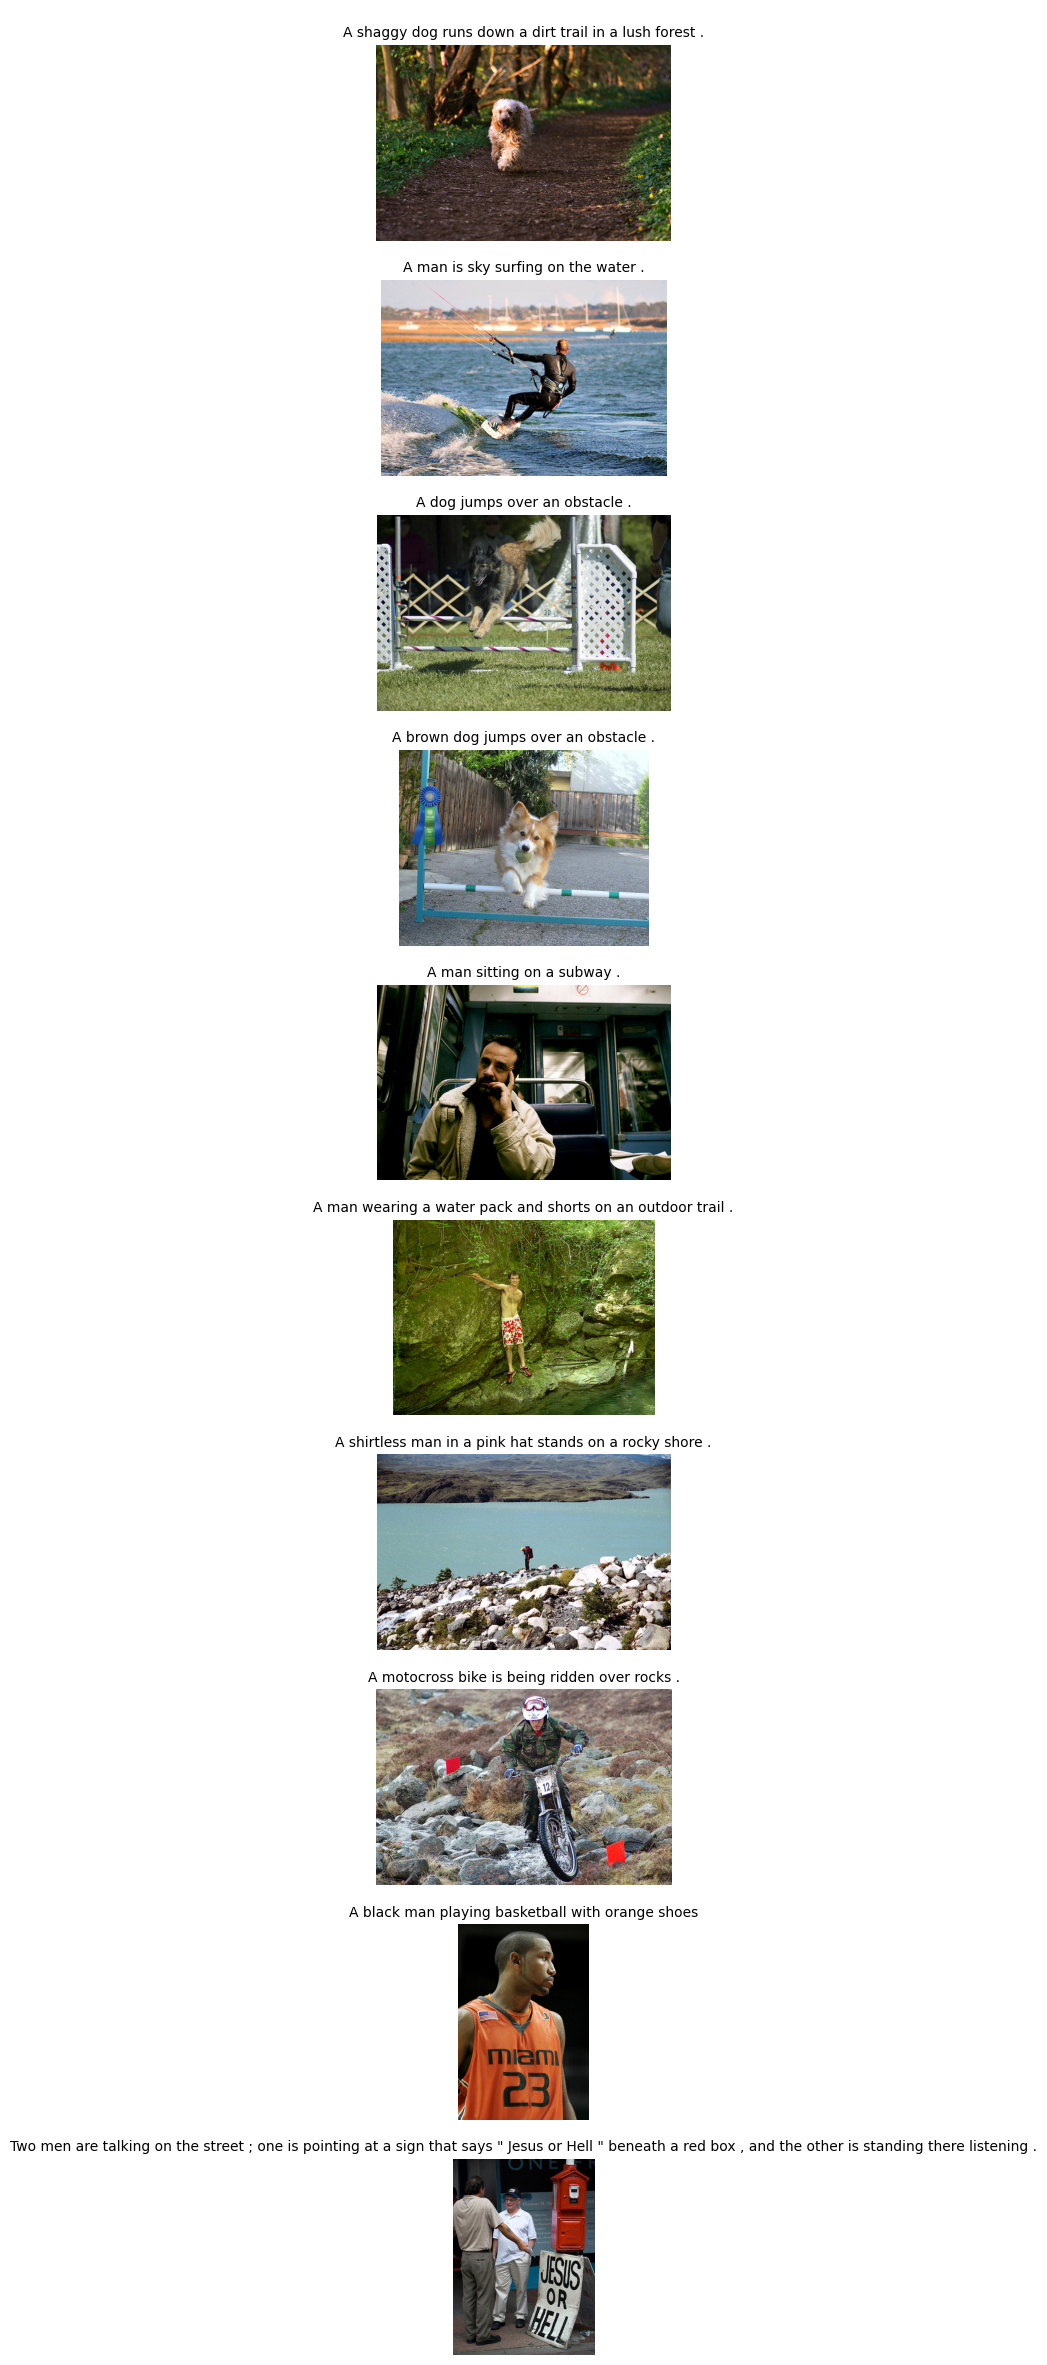

In [ ]:
visual_dataset = train_dataset[train_dataset['positive'] > 0.5].sample(10).copy()
visual_dataset.reset_index(inplace=True)

images = []
labels = []

for i in range(visual_dataset.shape[0]):
    images.append(f'{TRAIN_IMAGE_FOLDER}/{visual_dataset.iloc[i]["image"]}')
    labels.append(visual_dataset.iloc[i]['query_text'])

image_show(images, labels)

Комментарии к изображениями выглядят корректно.

**Выводы:** В рамках раздела выполнены следующие действия:
* Агрегация экспертной оценки методом большинства;
* Объединение оценок с приоритеток для экспертных оценок;
* Успешная визуальная проверка данных.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

## Проверка данных

В некоторых странах, где работает компания With Sense, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно, текстов, изображений, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16-ти лет. Необходимо очистить данные от проблемного контента.

In [ ]:
# стоп-слова выбирались при помощи просмотра изображений и нахождения из описаний
stop_words = [
    'baby',
    'child',
    'little boy',
    'little girl',
    'kid',
    'young girl',
    'young boy',
    'boy',
    'girl'
]

In [ ]:
def check_stop_words(txt):
    """
    Определение наличие стоп-слов

    Параметры:
    ----------
    txt: string - текст для анализа

    Результат:
    ----------
    boolean - результат обработки
    """
    txt = txt.lower()
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(txt)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_tokens])

    for word in stop_words:
        word_len = len(word.split())

        if word_len > 1:
            if word in txt:
                return True
        elif word_len == 1:
            if word in txt.split():
                return True

    return False

In [ ]:
train_dataset['stop_words'] = train_dataset['query_text'].apply(check_stop_words)
train_dataset[train_dataset['stop_words'] == True].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1200 entries, ('1056338697_4f7d7ce270.jpg', '2549968784_39bfbe44f9.jpg#2') to ('757046028_ff5999f91b.jpg', '2061144717_5b3a1864f0.jpg#2')
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   query_text       1200 non-null   object 
 1   positive_crowd   410 non-null    float64
 2   positive_expert  1172 non-null   float64
 3   positive         1185 non-null   float64
 4   stop_words       1200 non-null   bool   
dtypes: bool(1), float64(3), object(1)
memory usage: 123.5+ KB


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Идея с лемматизацией хороша. Но она очень "дорогая" - хорошая лемматизация занимает время. Кроме того ведь её нужно написать, проверить на ошибки, возможно "утащить в прод"..
    
А между тем лемматизация  нужна нам в двух случаях:  

 - При чистке датасета от детских изображений. 
 - При векторизации.
    
При поиске детских изображений я  считаю возможным упростить себе жизнь - взять возможные словоформы "запрещенных" слов. Как правиль их всего две - единственное и множественное число. 
    
А для вкторизациии делать лемматизацию в нашем случае не нужно. Модель BERT обучалась на обычных, сырых,не лемматизированных текстах.    

    
</div>

In [ ]:
display(train_dataset)

,,query_text,positive_crowd,positive_expert,positive,stop_words
image,query_id,,,,,
1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000000,0.000000,0.000000,True
1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,NaN,0.000000,0.000000,True
2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000000,0.000000,0.000000,True
2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.000000,1.000000,1.000000,True
2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,NaN,0.000000,0.000000,True
...,...,...,...,...,...,...
757046028_ff5999f91b.jpg,2061144717_5b3a1864f0.jpg#2,A man in an ampitheater talking to a boy .,0.333333,0.000000,0.000000,True
799486353_f665d7b0f0.jpg,2196107384_361d73a170.jpg#2,a old man walks down the uncrowded road .,NaN,0.000000,0.000000,False
909808296_23c427022d.jpg,2112921744_92bf706805.jpg#2,A dog stands on the side of a grassy cliff .,NaN,0.000000,0.000000,False


Поле `stop_words` - это флаг, говорящий о том, содержит ли комментарий слова из списка запрещенных. Теперь нам необходимо удалить комментарии, содержащие стоп-слова и соответствующие изображения.

Сформируем список файлов к удалению. Изображения удовлетворяющие условиям:
* Комментарий содержит плохие слова
* Оценка соответствия комментария и изображения выше порога.

In [ ]:
images_df = train_dataset.reset_index()
# Cоздадим список изображений
images_lst = images_df.query('stop_words == True and positive > 0.5')['image'].to_list()
# Удалим дубликаты
images_lst = list(set(images_lst))

Удалим файлы из полученного списка.

In [ ]:
for file in images_lst:
    try:
        os.remove(TRAIN_IMAGE_FOLDER+'/'+file)
    except FileNotFoundError:
        print('Не найден файл ',TRAIN_IMAGE_FOLDER+'/'+file)
    except:
        print('Неизвестная ошибка')

Удалим изображения из тренировочного датасета.

In [ ]:
train_dataset.reset_index(inplace=True)

In [ ]:
for file in images_lst:
    train_dataset = train_dataset[train_dataset.image != file]

Удалим записи из датасета.

In [ ]:
print(f'Будет удалено {len(train_dataset[train_dataset.stop_words == True])} записей')
train_dataset.drop(train_dataset[train_dataset.stop_words == True].index, inplace=True)
train_dataset.drop(columns=['stop_words'], inplace=True)

Будет удалено 1001 записей


In [ ]:
images_df = train_dataset.reset_index()
images_df.query('image == "2706766641_a9df81969d.jpg"')

,index,image,query_id,query_text,positive_crowd,positive_expert,positive


**Выводы:** В рамках раздела определен список стоп-слов. Удалены комментарии, содержащие слова из списка, а также соответствующие изображения.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Изображения с детьми удалены из датасета.
    
Ты совершенно верно учел, что нужно вначале найти изображения с детьми (и используешь логику "изображение соответствует описанию + "в описании есть дети".    

Подсвечу, что есть альтернативный способ.   Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
    
    
    
    
</div>

## Векторизация изображений

Используем архитектуру ResNet-18 для векторизации изображений.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Инициализация модели
weights = ResNet18_Weights.DEFAULT
model = resnet18(weights=weights)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Инициализация трансформации
preprocess = weights.transforms()

In [ ]:
return_nodes = {'flatten': 'flatten'}
feature_extractor = create_feature_extractor(model, return_nodes=return_nodes)

In [ ]:
def get_image_vector(image_path):
    """
    Получение вектора изображения

    Параметры:
    ----------
    image_path: string - путь к изображению

    Результат:
    ----------
    torch.Tensor
    """

    # Step 4: Load the image(s) and apply inference preprocessing transforms
    image = read_image(image_path).unsqueeze(0)
    model_input = preprocess(image).to(device)

    with torch.no_grad():
        # Step 5: Extract the features
        features = feature_extractor(model_input)
        flatten_fts = features["flatten"].squeeze()

        # тут специально переводим на CPU
        return flatten_fts.to('cpu').detach().numpy()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Скорее всего для каждого уникального пути эта функция будет вызываться чаще, чем один раз. Поэтому здесь "напрашивается" кэширование (можешь загуглить что такое lru_cache и как им пользоваться) </div>

Проверим размер вектора, который получается в результате применения функции.

In [ ]:
get_image_vector(TRAIN_IMAGE_FOLDER + '/54501196_a9ac9d66f2.jpg').shape

(512,)

Полученный размер вектора - 512. Осуществим векторизацию для всех изображений.

In [ ]:
def images2vector(folder):
    """
    Векторизация всех изображений в папке

    Параметры:
    ----------
    folder: string - путь к папке

    Результат:
    ----------
    image_vectors - векторизованные изобажения
    """
    # Посчитаем количество изображений в папке
    count = 0
    image_vectors = {}
    for p in Path(folder).glob('*.jpg'):
        count+=1
    # Осуществим векторизацию с использованием прогресс бара
    with tqdm(total=count) as pbar:
        for p in Path(folder).glob('*.jpg'):
            image_vectors[p.name] = get_image_vector(folder + f'/{p.name}')

            pbar.update(1)
        return image_vectors

In [ ]:
image_vectors = images2vector(TRAIN_IMAGE_FOLDER)

100%|████████████████████████████████████████████████████████████████████████████████| 920/920 [00:17<00:00, 51.39it/s]


In [ ]:
# проверим сформированный объект
img1 = list(image_vectors.keys())[0]
image_vectors[img1].shape

(512,)

Добавим поле с вектором изображения в тренировочный датасет.

In [ ]:
def get_vector_by(row):
    """
    По имени изображения достаём его вектор, который был создан выше

    Параметры:
    ----------
    row: Serias - строка датасета

    Результат:
    ----------
    numpy.ndarray - вектор
    """
    img = row['image']
    return image_vectors[img]

In [ ]:
train_dataset['vector_image'] = train_dataset.apply(get_vector_by, axis=1)
train_dataset.head()

,image,query_id,query_text,positive_crowd,positive_expert,positive,vector_image
22,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.0,0.0,"[0.66454345, 3.0099633, 2.8945677, 0.9445694, ..."
23,3187395715_f2940c2b72.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.0,0.0,"[0.27318504, 2.4646225, 1.6143509, 1.2424605, ..."
24,463978865_c87c6ca84c.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,0.0,0.0,0.0,"[0.973835, 3.8057532, 1.2916151, 0.80069304, 0..."
25,488590040_35a3e96c89.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.0,0.0,"[1.5541971, 1.0708148, 0.17263094, 0.2889718, ..."
26,534875358_6ea30d3091.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.0,0.0,"[0.33821714, 3.832079, 1.1654181, 0.51477605, ..."


**Выводы:** В рамках раздела выполнена векторизация изображений. Для этого использовалась заранее обученная модель resnet18. Это позволило сделать вектор длинной 512. Полученные векторы добавлены в тренировочный датасет.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Отлично, вектра для изображений получены👍 </div>

## Векторизация текста

Осуществим векторизацию текста с помощью BERT.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = AutoModel.from_pretrained('distilbert-base-uncased')
model.to(device)

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

In [ ]:
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Да, действительно, есть два разных способа "снять" эмбединг с модели. Один из них - с выхода, соответствующего нулевому токену (мы изучали этот подход в спринте по текстам). Считается что в этом токене собирается информация о всем тексте.

И да, позже обнаружили альтернативный подход - можно взять среднее по эмбеддингам и действительно такой подход работает, тем более что некоторые архитектуры энкодеров обучались без задачи Next Sentence Prediction (NSP - предсказание, является ли второе предложение логическим продолжением первого), на которой собственно и обучалась модель выдавать в выходе, соответствующем нулевому токену эмбеддинг всей фразы.
    
Учитывая, что ты работаешь с DistilBERT, который не обучался на задчу NSP, выбор стратегии "среднее по токенам эбеддингов описаний" выглядит очень грамотной стратегией.    

</div>

In [ ]:
def text2vector(sentences):
    #Tokenize sentences
    encoded_input = tokenizer(sentences, padding=True, truncation=True, max_length=128, return_tensors='pt').to(device)

    #Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)

    #Perform pooling. In this case, mean pooling
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

    pbar.update(1)
    ar = sentence_embeddings[0].to('cpu').detach().numpy()
    return ar

In [ ]:
with tqdm(total=train_dataset.shape[0]) as pbar:
        train_dataset['vector_text'] = train_dataset['query_text'].apply(lambda x: text2vector(x))

100%|██████████████████████████████████████████████████████████████████████████████| 4360/4360 [01:05<00:00, 66.33it/s]


In [ ]:
train_dataset.head()

,image,query_id,query_text,positive_crowd,positive_expert,positive,vector_image,vector_text
22,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.0,0.0,"[0.66454345, 3.0099633, 2.8945677, 0.9445694, ...","[0.15153722, -0.09737317, -0.015055794, -0.024..."
23,3187395715_f2940c2b72.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.0,0.0,"[0.27318504, 2.4646225, 1.6143509, 1.2424605, ...","[0.15153722, -0.09737317, -0.015055794, -0.024..."
24,463978865_c87c6ca84c.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,0.0,0.0,0.0,"[0.973835, 3.8057532, 1.2916151, 0.80069304, 0...","[0.15153722, -0.09737317, -0.015055794, -0.024..."
25,488590040_35a3e96c89.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.0,0.0,"[1.5541971, 1.0708148, 0.17263094, 0.2889718, ...","[0.15153722, -0.09737317, -0.015055794, -0.024..."
26,534875358_6ea30d3091.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.0,0.0,"[0.33821714, 3.832079, 1.1654181, 0.51477605, ...","[0.15153722, -0.09737317, -0.015055794, -0.024..."


In [ ]:
print(f'Размерность вектора {train_dataset.iloc[0]["vector_text"].shape}')

Размерность вектора (768,)


**Выводы:** В рамках раздела выполнена векторизация текста с помощью BERT. Размер вектора составил 768. Полученные векторы добавлены в тренировочный датасет.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично,полученные векторные представления для текстов описаний с помощью BERT (точнее его дистилированной версии) </div>

## Объединение векторов

Объединим полученные векторы.

In [ ]:
def join_vectors(row):
    """
    Объединяем два вектора, текст и изображение

    Параметры:
    ----------
    row: Serias

    Результаты:
    numpy.ndarray - объдинённый вектор
    """
    return np.concatenate((row['vector_text'], row['vector_image']))

In [ ]:
train_dataset['vector'] = train_dataset.apply(join_vectors, axis=1)
train_dataset.head()

,image,query_id,query_text,positive_crowd,positive_expert,positive,vector_image,vector_text,vector
22,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.0,0.0,"[0.66454345, 3.0099633, 2.8945677, 0.9445694, ...","[0.15153722, -0.09737317, -0.015055794, -0.024...","[0.15153722, -0.09737317, -0.015055794, -0.024..."
23,3187395715_f2940c2b72.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.0,0.0,"[0.27318504, 2.4646225, 1.6143509, 1.2424605, ...","[0.15153722, -0.09737317, -0.015055794, -0.024...","[0.15153722, -0.09737317, -0.015055794, -0.024..."
24,463978865_c87c6ca84c.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,0.0,0.0,0.0,"[0.973835, 3.8057532, 1.2916151, 0.80069304, 0...","[0.15153722, -0.09737317, -0.015055794, -0.024...","[0.15153722, -0.09737317, -0.015055794, -0.024..."
25,488590040_35a3e96c89.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.0,0.0,"[1.5541971, 1.0708148, 0.17263094, 0.2889718, ...","[0.15153722, -0.09737317, -0.015055794, -0.024...","[0.15153722, -0.09737317, -0.015055794, -0.024..."
26,534875358_6ea30d3091.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.0,0.0,"[0.33821714, 3.832079, 1.1654181, 0.51477605, ...","[0.15153722, -0.09737317, -0.015055794, -0.024...","[0.15153722, -0.09737317, -0.015055794, -0.024..."


In [ ]:
print(f'Длина итогового вектора равна {len(train_dataset.iloc[0]["vector"])}')

Длина итогового вектора равна 1280


Скопируем полученный результат в новый датафрейм `df`, который будет использован для обучения модели.

In [ ]:
df = train_dataset.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4360 entries, 22 to 5820
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   image            4360 non-null   object 
 1   query_id         4360 non-null   object 
 2   query_text       4360 non-null   object 
 3   positive_crowd   1823 non-null   float64
 4   positive_expert  4266 non-null   float64
 5   positive         4321 non-null   float64
 6   vector_image     4360 non-null   object 
 7   vector_text      4360 non-null   object 
 8   vector           4360 non-null   object 
dtypes: float64(3), object(6)
memory usage: 340.6+ KB


Удалим те записи, у которых нет оценки (это раннее удалённые записи у экспертов, которые разошлись в оценке).

In [ ]:
df.drop(df[df['positive'].isna()].index, inplace=True)
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4321 entries, 0 to 4320
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   image            4321 non-null   object 
 1   query_id         4321 non-null   object 
 2   query_text       4321 non-null   object 
 3   positive_crowd   1823 non-null   float64
 4   positive_expert  4266 non-null   float64
 5   positive         4321 non-null   float64
 6   vector_image     4321 non-null   object 
 7   vector_text      4321 non-null   object 
 8   vector           4321 non-null   object 
dtypes: float64(3), object(6)
memory usage: 303.9+ KB


**Выводы:** В рамках раздела в тренировочный датасете добавлено новое поле с объединением 2-х векторов. Длина вектора составила 1280. Также создан датафрейм `df`, готовый для обучения модели.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены👍 </div>

## Обучение модели предсказания соответствия

### Разделение датасета на тренировочную и тестовую выборки

Для обучения необходимо разделить датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки.
Для того чтобы учесть изображения при разбиении, воспользуемся классом `GroupShuffleSplit` из библиотеки `sklearn.model_selection`.

In [ ]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=RANDOM_STATE)
train_indices, test_indices = next(gss.split(X=df.drop(columns=['positive']), y=df['positive'], groups=df['image']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Только давай разберемся с выборками. Финальное тестирование (визуальное) мы делаем на отложенной выборке. Поэтому выборка,которую ты сейчас отделил играет роль валидационной. Есть смысл в её названии использовать слово valid а не test</div>

Создадим необходимые тензоры.

In [ ]:
# создаём тензоры
features_train = torch.FloatTensor(list(train_df.loc[:, 'vector'].values))
features_test = torch.FloatTensor(list(test_df.loc[:, 'vector'].values))

target_train = torch.FloatTensor(train_df['positive'].values).reshape(-1, 1)
target_test = torch.FloatTensor(test_df['positive'].values).reshape(-1, 1)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мы решаем новую задачу и не знаем, наксколько хороши наши метрики и наши модели. Поэтому советую начать с бейзлайна - константной модели (можешь взять простой DummyRegressor).</div>

### Модель линейной регрессии

В данном случае мы решаем задачу регрессии. Воспользуемся моделью линейной регресии `LinearRegression`. Для проверки качества модели здесь и далее будем использовать `RMSE`.  

`RMSE` – метрика симметричная относительно знака ошибки, чувствительная к большим отклонениям от среднего значения фактической величины продажи. Использование `RMSE` в задачах регрессии позволяет избежать больших ошибок в прогнозах.

In [ ]:
model_lr = LinearRegression()
model_lr.fit(features_train, target_train)

LinearRegression()

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Обычно перед линейной регрессией я обязательно требую масштабировать признаки, т.к. это может помочь модели лучше сходиться.  И для любого классического проекта (в том числе выпускного) это строгая рекомендаци.
    
Но в нашем проекте это не очень однозначно. Да, с одной стороны модель будет уделать одинаковое влияние обоим признакам, да и учиться будет быстрее.    

Но есть и минусы масштабирования:

 - Нарушение структуры эмбеддингов – смысл и семантические связи в эмбеддингах могут быть изменены.
 - Потеря важности признаков – относительная важность признаков из разных моделей (ResNet и BERT) может быть потеряна.

Рекомендация:

Попробуй оба подхода (с масштабированием и без) и сравни результаты, чтобы выбрать оптимальный вариант.    
    

</div>

In [ ]:
pred = model_lr.predict(features_test)
rmse_lr = root_mean_squared_error(target_test, pred)

print(f'RMSE для LinearRegression равно', round(rmse_lr, 2))

RMSE для LinearRegression равно 11.41


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
О чем нам говорит полученный результат? Модель дико переобучилась, скорее всего вследствие мультиколлинеарности в наших признаках. Стандартная "таблетка" в таких случаях - это регуляризация. Можешь попробовать "покрутить" модели Ridge/Lasso, посмотреть как разная сила регуляризации будет влиять на метрики.

И конечно же главный вывод, который мы должны сделать - для нейронки регуляризация обязательна, т.к. она еще более склонна к переобучению за счет гораздо большего количества обучаемых параметров.


</div>

Для модели `Linearregression` показатель `RMSE` составил 11.41.

### Полносвязная нейронная сеть

Создадим класс для кастомного датасета.

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, features, target):
        self.features = features
        self.target = target

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.target[idx]

Применим CustomDataset и DataLoader.

In [ ]:
train_dataset = CustomDataset(features_train, target_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = CustomDataset(features_test, target_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

Проверим работу.

In [ ]:
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([32, 1280])
Labels batch shape: torch.Size([32, 1])


Создадим собственную сеть с 6-ю слоями.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1280, 8192)
        self.fc2 = nn.Linear(8192, 4096)
        self.fc3 = nn.Linear(4096, 2048)
        self.fc4 = nn.Linear(2048, 512)
        self.fc5 = nn.Linear(512, 64)
        self.fc6 = nn.Linear(64, 1)

        self.dp = nn.Dropout(p=0.5)
        self.relu = nn.LeakyReLU()

    def forward(self, x):
        x = self.fc1(x)

        x = self.fc2(x)
        x = self.relu(x)

        x = self.fc3(x)
        x = self.relu(x)

        x = self.fc4(x)
        x = self.relu(x)

        x = self.fc5(x)
        x = self.relu(x)

        x = self.fc6(x)

        return x

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
    
На мой взгляд модель "тяжеловата".  Я подсчитал, что в ней около около 53,5M обучаемых параметров. Для сравнения Resnet50 - 25,6M, DistilBERT - 66М, BERT - 110М.   Т.е. вес у модели очень даже "взрослый", но вот обучается она на сверхмалом датасете, тем более всего 10 эпох...
    
Но это просто мысли, если твоя модель будет адекватно работать (или хотя-бы показавать зачатки интеллекта), то "победителей не судят". Этот проект слишком сложен и непредсказуем ))    
    
-------
    
И к тому же ты не используешь регуляризацию, что сразу же приводит к переобучению.    

</div>

Выберем для модели следующие параметры:
* Функция потерь - MSE
* Оптимизатор - Adam
* Число эпох - 10.

In [ ]:
models = Net()
models.to(device)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(models.parameters(), lr=5e-6)

epochs = 10
min_valid_loss = np.inf

Запустим обучение. Промежуточный результат будем сохранять есть метрика качества на последней эпохе лучше предыдущей.

In [ ]:
for e in range(epochs):
    train_loss = 0.0
    # Обучение модели
    models.train()
    for data, labels in train_dataloader:
        data, labels = data.to(device), labels.to(device)

        optimizer.zero_grad()
        target = models(data)
        loss = torch.sqrt(criterion(target,labels))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
    # Валидация модели
    valid_loss = 0.0
    models.eval()

    for data, labels in test_dataloader:
        data, labels = data.to(device), labels.to(device)

        target = models(data)
        loss = torch.sqrt(criterion(target, labels))
        valid_loss += loss.item() * data.size(0)
    # Вывод информации
    print(f'Epoch {e+1} \t\t Training Loss: {train_loss / len(train_dataloader)}\
          \t\t Validation Loss: {valid_loss / len(test_dataloader)}')
    if min_valid_loss > valid_loss:
        print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        min_valid_loss = valid_loss
        # Сохранение состояния модели
        torch.save(models.state_dict(), TMP + '/saved_model.pth')

Epoch 1 		 Training Loss: 10.010862896944348          		 Validation Loss: 9.577781739758283
Validation Loss Decreased(inf--->392.689051) 	 Saving The Model
Epoch 2 		 Training Loss: 9.536736862910422          		 Validation Loss: 9.517407770563917
Validation Loss Decreased(392.689051--->390.213719) 	 Saving The Model
Epoch 3 		 Training Loss: 9.411099419468327          		 Validation Loss: 9.350326842651135
Validation Loss Decreased(390.213719--->383.363401) 	 Saving The Model
Epoch 4 		 Training Loss: 9.144535108459623          		 Validation Loss: 9.262463229458506
Validation Loss Decreased(383.363401--->379.760992) 	 Saving The Model
Epoch 5 		 Training Loss: 8.939439587216627          		 Validation Loss: 9.192618068398499
Validation Loss Decreased(379.760992--->376.897341) 	 Saving The Model
Epoch 6 		 Training Loss: 8.73066497100027          		 Validation Loss: 9.17035005441526
Validation Loss Decreased(376.897341--->375.984352) 	 Saving The Model
Epoch 7 		 Training Loss: 8.58013837

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Обычно я не придираюсь к метрикам моделей, но здесь сложно пройти мимо. Ни одна из твоих моделей не проходит проверку на адекватность (у Дамми модели метрика RMSE около 0.32, а здесь ошибка выше почти на два порядка.

О переобучении мы пока даже заикаться не можем, т.к. метрика на обучающей выборке у тебя тоже слишком велика.    
    
Попробуй поработать с архитектурой/процессом обучения и добиться более адекватных значений.

---------------------
    
Но веса той модели, которая неплохо находит собачек можешь сохранить ))    
    
</div>



На мой взгляд ты воспринимаешь "количество эпох" как гиперпараметр "спущеный с верху". Т.е. устанавливаем параметры сети, запускаем обучение и смотрим на результат.
    
Но в случае с нейронками логика ипользования немного отличается от того, к чему мы привыкли в классических моделях. Здесь лучше работать по другой логике:
    
 - оределилили архитектуру, создали модель
 - начинаем её учить. и учим пока метрика на валидационной выборке улучшается.  Наблюдая в динамике метрики на обучающей и валидационной выборках.
 - если вдруг метрика на обучающей выборке перестала снижаться, можно попробовать уменьшить шаг обучения (например в 10 раз) и продолжить обучение модели.
    
В любом случае полезно обучать модель пока метрика на валидации улучшается. Наша цель - оптимальное состояние модели, при котором модель хорошо находит законмоерности в данных, но еще не переобучилась.
        
После того, как закончили обучение смотрим на логи, анализируем, чего модели не хватило, меняем архитектуру и запускаем обучение по новой.    
    

    

    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">


Для осознанной настройки нейронки важно понимать, как менять её архитектуру (усложнять и уменьшать регуляризацию? уменьшать шаг обучения? усиливать регуляризацию?). Для того чтобы принять эти  решения мало видеть только конечную цифру, важно понимать, чего модели не хватает чтобы метрика стала лучше.
    
    
Вот типичные  проблемы, которые можно выявить  анализируя графики и пути их решения:

<b>Недообучение (Underfitting)</b>
  Признаки: Высокие значения потерь и низкая точность как на обучающей, так и на валидационной выборке. Графики потерь не снижаются (или снижаются  недостаточно).
  
  Решения:
    
 - Увеличение сложности модели (добавление слоев, увеличение числа нейронов).
 - Использование более сложных моделей, таких как более глубокие нейронные сети.
 - Увеличение количества эпох обучения.

<b>Переобучение (Overfitting)</b>
  Признаки: Значительное снижение потерь и увеличение точности на обучающей выборке, но высокие потери и низкая точность на валидационной выборке. Графики начинают расходиться после некоторого количества эпох.
    
 Решения:
  - Регуляризация (L1, L2 регуляризация).
  - Dropout (добавление Dropout слоев).
  - Уменьшение сложности модели (уменьшение числа слоев или нейронов).
  - Использование аугментации данных для увеличения разнообразия данных.
  - Раннее завершение обучения (Early Stopping) на основе валидационной ошибки.

<b>Плохой выбор гиперпараметров</b>
 Признаки: Нестабильные графики потерь и точности (большие колебания).
 
 Решения:
  - Настройка скорости обучения (learning rate).
  - Оптимизация размера батча (batch size).
  - Попробовать другие оптимизаторы (например, Adam, SGD с различными параметрами).    

</div>

Лучшие результаты были показаны на 7-ой эпохе, `RMSE` на тренировочной выборке 8.58, на валидационной - 9.16.

**Выводы:** В рамках раздела успешно выполнены следующие действия:
* Датасет раздел на тренировочную и тестовую выборки
* Для проверки качества моделей выбрана и обоснована метрика `RMSE`
* Обучена модель `LinearRegression`. Показатель RMSE - 11.41
* Обучена полносвязная нейронная сеть. Лучший показатель `RMSE` на тренировочной выборке 8.58, на валидационной - 9.16.

Таким образом, лучший результат показала полносвязная нейронная сеть. Она и будет использована для тестирования.

## Тестирование модели

### Загрузка модели

Загрузим ранее сохраненную полносвязную нейронную сеть.

In [ ]:
# загрузим модель
models = Net()
models.to(device)

models.load_state_dict(torch.load(TMP + '/saved_model.pth'))
models.eval()

Net(
  (fc1): Linear(in_features=1280, out_features=8192, bias=True)
  (fc2): Linear(in_features=8192, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=2048, bias=True)
  (fc4): Linear(in_features=2048, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=64, bias=True)
  (fc6): Linear(in_features=64, out_features=1, bias=True)
  (dp): Dropout(p=0.5, inplace=False)
  (relu): LeakyReLU(negative_slope=0.01)
)

### Загрузка тестовых данных

Загрузим список тестовых изображений.

In [ ]:
test_images_df = pd.read_csv(ROOT_FOLDER + '/to_upload/test_images.csv')
test_images_df.info()
test_images_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


,image
0,3356748019_2251399314.jpg
1,2887171449_f54a2b9f39.jpg
2,3089107423_81a24eaf18.jpg
3,1429546659_44cb09cbe2.jpg
4,1177994172_10d143cb8d.jpg


Загрузка описаний для тестовых данных.

In [ ]:
test_queries_df = pd.read_csv(ROOT_FOLDER + '/to_upload/test_queries.csv', sep='|', index_col=0)
test_queries_df.info()
test_queries_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    500 non-null    object
 1   query_text  500 non-null    object
 2   image       500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


,query_id,query_text,image
0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg
1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg
2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg
3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at eac...,1177994172_10d143cb8d.jpg
4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each oth...,1177994172_10d143cb8d.jpg


Создадим эмбеддинги для изображений.

In [ ]:
image_vectors = images2vector(TEST_IMAGE_FOLDER)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 50.55it/s]


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Да, эмбединги для 100 тестовых изображений оптимально посчитать заранее </div>

### Тестирование модели

Создадим функцию, которая по тексту будет подбирать изображения, используя загруженную модель.

In [ ]:
def search_image(txt):
    """
    Функция для поиска изображений по описанию

    Параметры:
    ----------
    txt: string - описание изображения

    Результат:
    ----------
    string - путь к изображению
    string - описание
    float - вероятность
    """
    if check_stop_words(txt):
        # Выводим сообщение связанное с юридическими ограничениями
        return TMP+'/No-image-available.jpg',\
               f'{txt}\nThis image is unavailable in your country in compliance with local laws', None

    vector = text2vector(txt)

    # создадим данные для модели
    data = []
    images = []

    for key in image_vectors.keys():
        images.append(key)

        img = image_vectors[key]
        data.append(np.concatenate((vector, img)))

    with torch.no_grad():
        pred = models(torch.FloatTensor(data).to(device)).to('cpu')

        # получаем индекс записи, которая больше всего подходит под описание

        idx = pred.numpy().argmax(axis=0)[0]


    return f'{TEST_IMAGE_FOLDER}/{images[idx]}', txt, pred[idx].numpy()[0]

Загрузим изображение, которое будет выдаваться в случае юридических ограничений.

In [ ]:
urllib.request.urlretrieve('https://upload.wikimedia.org/wikipedia/commons/f/f9/No-image-available.jpg',\
                           TMP+'/No-image-available.jpg')

('D:/Projects/datasets/search_for_reference_photos/cache/No-image-available.jpg',
 <http.client.HTTPMessage at 0x1f9ac7ceaf0>)

Проверим работу функции на 10 изображениях.

In [ ]:
images = []
labels = []
scores = []
# получаем 10 случайных примеров из тестового dataset'а
queries = list(test_queries_df.sample(10)['query_text'])

for i in range(len(queries)):

    image_path, title, score = search_image(queries[i])

    images.append(image_path)
    if score == None:
        scores.append(None)
    else:
        scores.append(round(score, 2))
    labels.append(title)

Выведем результат работы.

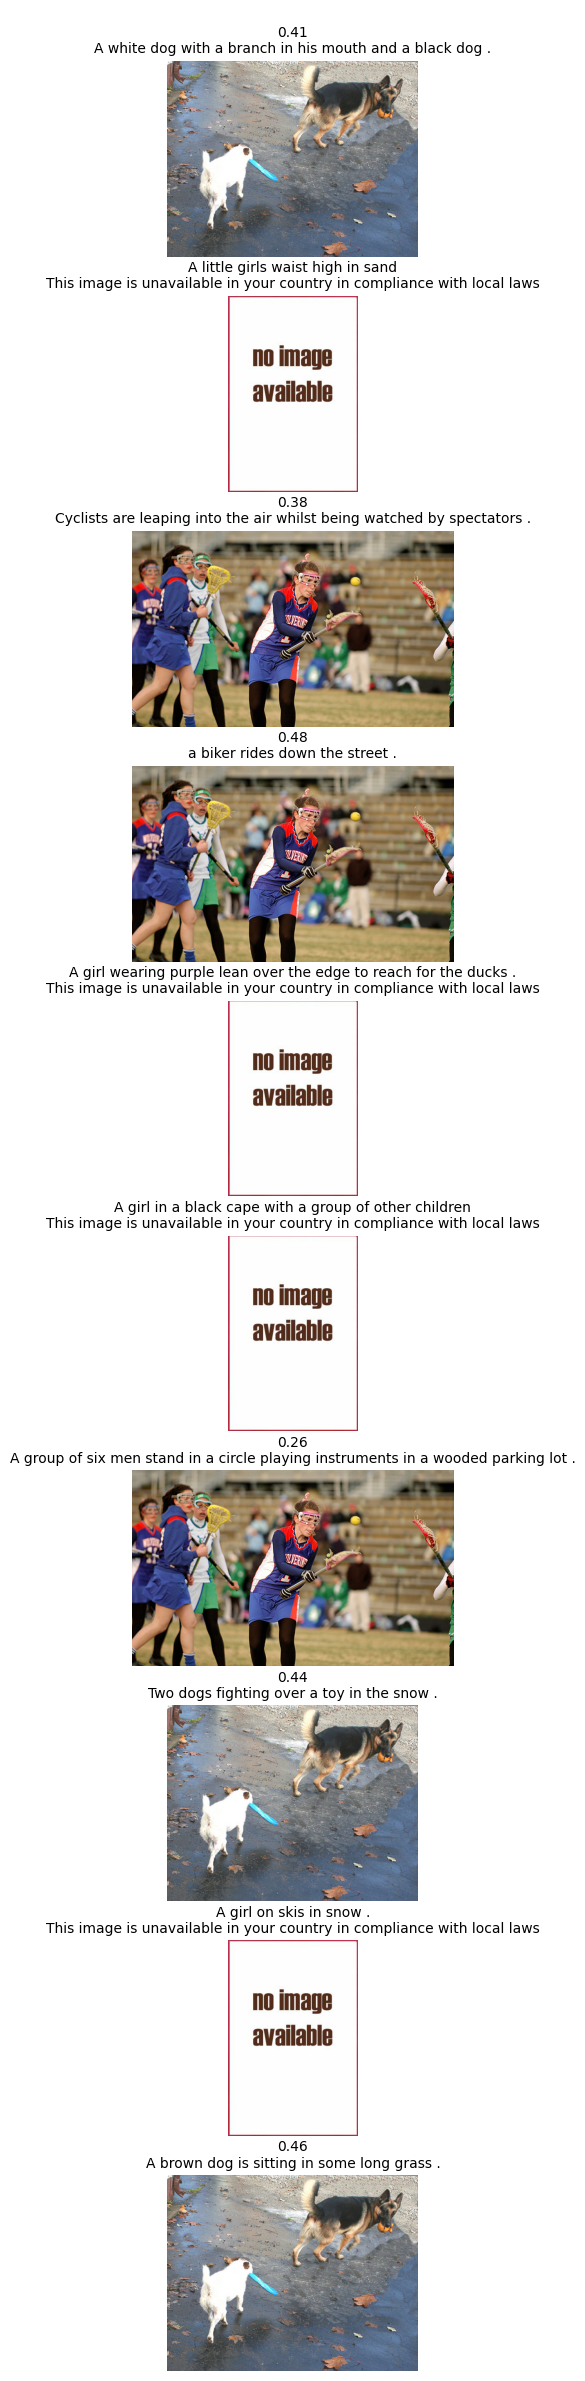

In [ ]:
image_show(images, labels, scores)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Функции написаны и со своей задачей справляются. Принимают на вход текст и находят изображение. Отрабатывают контроль "запрещенного контента".

Мне очень понравилось, что модель четко находит собак. Это уже "зачатки", хотя когда я перезапустил твой код, то воспроизвести результат не получилось.  С другой стороны, так часто бывает.
    
----------------
    
Как правило хороший результат в этом проекте удается достичь при выполнении следующих условий
    
 - использование экспертных оценок   
 - векторизация изображений через pytorch, как есть в теории к спринту  (но с отрезанием только одного слоя)
 - эмбеддинги через bert
 - упорное обучение нейронки (иногда тысячи эпох, в любом случае пока лосс снижается) с тщательным подбором гиперпараметров.   
    
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому. 
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения. 
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0). 
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768). 
    
   
</div>

Функция выполняет свою работу, находит изображение по тексту, а также учитывает стоп-слова.

**Выводы:** В рамках раздела было успешно загружены лучшая модель и тестовые данные. Подготовлена и проверена функция для поиска изображений по тексту.

## Выводы

В рамках задачи реализован PoC для поиска референсных изображений по тексту. Для этого используется 6-ти слойная полносвязная нейронная сеть и специальная функция. Также PoC учитывает юридические ограничения для различных стран. Однако, результаты тестирования показывают, что модель требует дальнейшего обучения на большем числе примеров для улучшения качества.

Для достижения данных результатов была проделана следующая работа:
* Произведена загрузка данных;
* Выполнен исследовательский анализ данных: агрегация экспертной оценки, объединение оценок и визуальный контроль;
* Выполнена проверка данных на наличие стоп-слов;
* Произведена векторизация изображений и текста;
* Выбрана метрика для оценки качества моделей;
* Обучено 2 модели:
    * Линейная регрессия показала резульат RMSE 11.41;
    * Полносвязная нейронная сеть показала результат RMSE 9.16;
* Разработана функция на основе лучшей модели, осуществляющая поиск изображения по описанию на тестовых данных.

## Чек-лист проверки

- [x] Jupyter Notebook открыт
- [x] Весь код выполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Исследовательский анализ данных выполнен
- [x] Проверены экспертные оценки и краудсорсинговые оценки
- [x] Из датасета исключены те объекты, которые выходят за рамки юридических ограничений
- [x] Изображения векторизованы
- [x] Текстовые запросы векторизованы
- [x] Данные корректно разбиты на тренировочную и тестовую выборки
- [x] Предложена метрика качества работы модели
- [x] Предложена модель схожести изображений и текстового запроса
- [x] Модель обучена
- [x] По итогам обучения модели сделаны выводы
- [x] Проведено тестирование работы модели
- [x] По итогам тестирования визуально сравнили качество поиска

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Проведено исследование и предобработка данных. Выполнена векторизация изображений и текстовых описаний. Обучены модели для предсказания степени соответствия, а также написана функция для инференса и с её помощью проведено тестирование.
 
    
  У меня нет критичных замечаний к твоей работе. Проект может быть принят уже сейчас. Возвращаю проект чтобы дать тебе возможность ознакомиться с моими комментариями, возможно у тебя возникнет желание задать вопросы или внести корректировки в проект.

    
Желтые комментарии на твое усмотрение. Но учитывая что наш подход не идеален, попробуй показать возможный инференс с помщью CLIP. С библиотекой sentence-transformers это делается буквально в 10 строк.    
Жду твою работу на повторное ревью.
</div>